Data
Data yang digunakan: loan_data.csv

Link download dataset
https://drive.google.com/file/d/1K6OMDYu6yRdUO65Le1NbRBTNFPsbAX6s/view?usp=sharing


Submission<br>
-Gunakan Jupyter Notebook<br>
-Tambahkan markdown agar notebook mudah dipahami.<br>
-Nomor soal ditulis dengan jelas menggunakan markdown.<br>
-Isi dengan link github dengan ketentuan nama file: [nama]_finaltest.ipynb

## 1 Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2 Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3 Import loan_data.csv. Identifikasi tipe data dari masing-masing variable. Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.m

In [13]:
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [14]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## 4 Lakukan pengecekan missing data dan duplicated-row. Jika ada, sebutkan kolom apa yang ada missing data. Apakah ada duplicated-row?

In [15]:
#melihat persentase total missing value dari keselurhan data
sum(data.isna().sum())/(data.shape[0]*data.shape[1])*100

0.0

In [203]:
data.duplicated().sum()

0

Tidak adanya missing value dan duplikasi data

## 5 Lakukan pengecekan variabel target. Ada berapa kategori pada variable target? Berapa proporsinya? Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

In [27]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

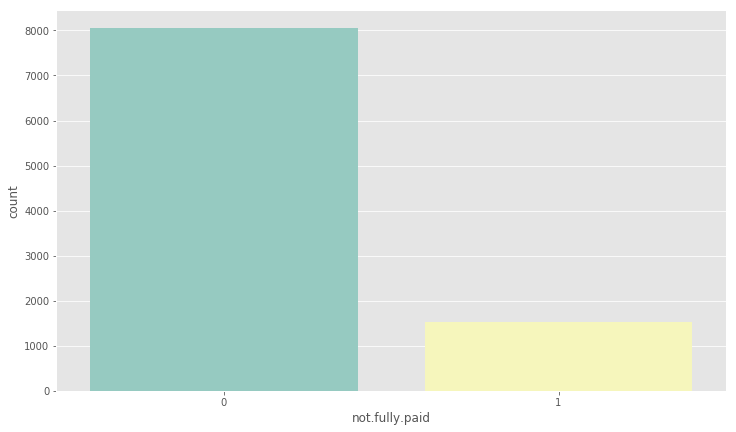

In [205]:
f = plt.figure(figsize=(12,7))

f.add_subplot(1,1,1)
sns.countplot(data['not.fully.paid'],palette='Set3')

## 6 Berapa variansi (ragam) nilai installment?

In [44]:
np.var(data['not.fully.paid'])

0.13443691498938823

## 7 Berapa nilai simpangan kuartil pada variable ‘installment’?

In [50]:
x = np.array(data['installment'])
q1_x = numpy.percentile(x, 25, interpolation='midpoint')
q3_x = numpy.percentile(x, 75, interpolation='midpoint')
print(q3_x - q1_x)

268.855


## 8 Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [63]:
I_P = data[['installment', 'purpose']].groupby('purpose').max().sort_values('installment',ascending=False)

In [66]:
I_P

,installment
purpose,
debt_consolidation,940.14
small_business,926.83
credit_card,922.42
all_other,916.95
home_improvement,902.06
major_purchase,898.55
educational,861.88


## 9 Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.Ada berapa kategori pada variable tersebut? Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

In [77]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [78]:
sort = pd.DataFrame(data['purpose'].value_counts())

In [79]:
sort

,purpose
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


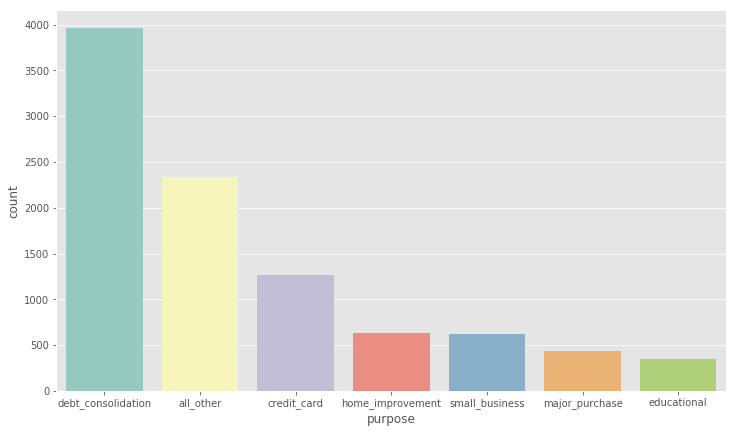

In [206]:
plt.style.use('ggplot')

f = plt.figure(figsize=(12,7))
               
f.add_subplot(1,1,1)
sns.countplot(data['purpose'], order=sort.index, palette='Set3')

## 10 Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.

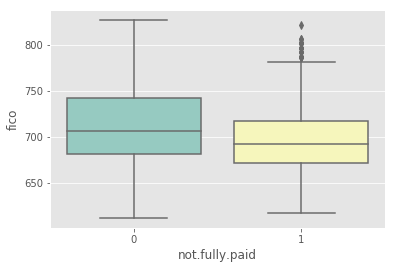

In [207]:
sns.boxplot(x=data['not.fully.paid'], y=data['fico'], palette='Set3')

Dari boxplot diatas, menunjukan bahwa **fico** tidak terlalu berpengaruh terhadap variabel target **not.fully.paid** karena persebaran datanya menunjukkan kecenderungan seragam

In [90]:
data['not.fully.paid'].corr(data['fico'], method="spearman")

-0.1479199091730053

Selain itu, korelasi antara kedua variabel bernilai min dan kecil sehingga tidak memiliki korelasi yang tinggi

## 11.Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

 



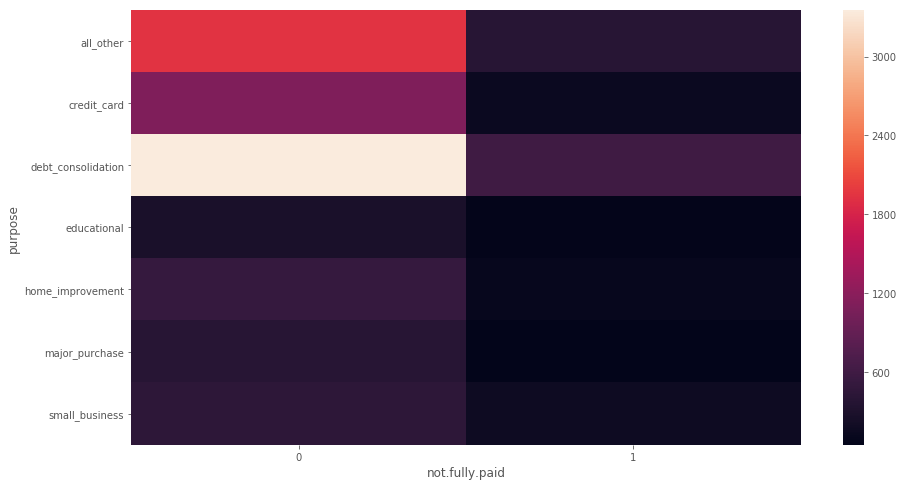

In [97]:
heat = pd.crosstab(data['purpose'],data['not.fully.paid'])
plt.figure(figsize=(15,8))
sns.heatmap(heat)

In [92]:
data['not.fully.paid'].corr(data['purpose'], method="spearman")

C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.03612826836531154

Pada hasil crostab diatas menunjukan bahwa variabel yang memiliki hubungan dengan orang yang bayar penuh (0) ialah variabel purpose yang memiliki credit card, all other dan debt consilidation. Sehingga informasi diatas menunjukkan bahwa nasabah yang memiliki tujuan debt_consolidation, dan credit card berpeluang besar untuk membayar penuh. Tetapi tidak dengan variabel lainnya.<br>
Sehingga purpose bisa dijadikan predictor potensial dalam menentukan prediksi target

## 12 Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [109]:
print('nilai rata-rata dari int.rate untuk purpose dengan kategori credit_card', data[data['purpose']=='credit_card']['int.rate'].mean())

nilai rata-rata dari int.rate untuk purpose dengan kategori credit_card 0.11973819334389857


## 13 Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [117]:
kasus = data[(data['installment'] >200) & (data['purpose'] =='educational')]['int.rate'].count()
print('Kasus :',kasus)

Kasus : 137


## 14 Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [204]:
loans3 = data[data['purpose'] =='credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


## 15. Siapkan data untuk pemodelan. Ubah data kategorik menjadi dummy variabel. Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [183]:
Y = data2['not.fully.paid']
X = data2.drop('not.fully.paid',1)

In [184]:
dummies = pd.get_dummies(data['purpose'])
dummies.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [185]:
data2 = pd.concat([data,dummies],axis=1)
data2.drop('purpose',axis=1,inplace=True)

## 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=101)

## 17 Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [187]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 18 Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [188]:
y_pred = DT.predict(X_test)

In [196]:
y_pred_proba = DT.predict_proba(X_test)

## 19 Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [200]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## 20 Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [202]:
#####from confusion matrix calculate accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy    : ', round(accuracy*100,2))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round(sensitivity*100,2))

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round(specificity*100,2))

Accuracy    :  72.51
Sensitivity :  81.41
Specificity :  23.7


- **Accuracy**: Rasio dari total kebenran dengan keselurhan data
- **Sensitivity**: Rasio kebenaran prediksi positive dibandingkan dengan keseluhan data yang positif
- **Specificity**: Rasio Kebeneranan prediksi negative dibandingkan dengan keselurhan data yang negative